## Final Project Submission

Please fill out: 
* Student name:    1.Kelvin Mutua

                  2. Hannah Nyambura 

                  3. Samwel Kipkemboi

                  4. Brian Kanyenje

                  5.
                 
* Student pace:      HYBRID
* Scheduled project review date/time: 
* Instructor name:     SAMUEL KARU
* Blog post URL:


# MICROSOFT MOVIE STUDIO INSIGHT
---


# PROJECT OVERVIEW
- The aim of this project is to analyze which type of films are currently doing the best at the box office to help the company decide which type of films to create.

# BUSINESS PROBLEM
- A company has decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of this company's new movie studio can use to help decide what type of films to create.



# OBJECTIVES
* To determine which movie genres perform highly in terms of revenue and viewer rating.
* To determine which directors and actors are linked to the highest performing movies.
* To determine whether movie budget affects the overall performance of a movie.

# PROJECT GOAL

- To identify the key factors that drive movie success (financially and with audiences) in order to guide the new movie studio on what types of films to produce, invest in, and promote.

## Importing the necessary libraries

In [1]:
import pandas as pd
import gzip
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

## Loading Datasets

### 1. im.db Database

In [2]:
# Unzip the archive manually 
import zipfile
import os

zip_path = './zippedData/im.db.zip'  # replace with actual file
extract_path = './zippedData/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


In [3]:
# Load the imdb database
conn = sqlite3.connect('./zippedData/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type=='table';" ,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


**Tables to use:**
>* movie_basics
>* directors
>* movie_ratings
>* persons

In [4]:
# loading movie_ratings
pd.read_sql("SELECT * FROM movie_ratings", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
# display movie_basics table
pd.read_sql("SELECT * FROM movie_basics", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# display persons table
pd.read_sql("SELECT * FROM persons", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [7]:
# display directors table
pd.read_sql("SELECT * FROM directors", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


### 2. tn.movie_budgets Dataset

In [8]:
# Load the tn.movie_budgets dataset
movie_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', compression='gzip', index_col='id')
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

### 1. imdb Dataset

In [9]:
#Create a function to check for duplicates in a table
def duplicates(table_name): #defines a function named duplicates that takes one input parameter:
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).duplicated().sum()

`.duplicated()`
This Pandas method returns a Boolean Series that flags whether each row in the DataFrame is a duplicate of a previous row (based on all columns by default).

Count of Duplicates and Non-Duplicates
`.value_counts()`
This counts how many True (duplicate rows) and False (unique rows) values are returned by `.duplicated()`.

In [10]:
# Create a function to check for missing values in a table
def missing(table_name):
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).isna().sum()

`pd.read_sql(...)`: Reads all rows from the specified SQL table into a Pandas DataFrame.

`.isna()`: Checks each value in the DataFrame for missing data (i.e., NaN).

`.sum()`: Aggregates the number of missing values in each column.

In [11]:
#Check for duplicates
duplicates('movie_basics')

0

This means all 146,144 rows are unique, and no duplicates were found in the `movie_basics table`, indicating good data integrity for this dataset.

In [12]:
# Check for missing values
missing('movie_basics')

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Ther are 21 missing values in `original_title`, 31739 in runtime_minutes and 5408 in `genres`.

WE fill `runtime_minutes` with median for these reason:
> The median is a robust statistic that better represents the "typical" movie length when the data is skewed.

> It prevents distortion in the dataset that could happen if extremely long or short runtimes heavily influence the mean.

In [13]:
# Assign the movie_basics table to a DataFrame
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# Fillthe missing values in the runtime_minutes column with the median value of the column
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
movie_basics.isna().sum()

movie_id              0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

> The number of remaining missing rows was likely small relative to the overall dataset, so removing them minimized data loss.



In [14]:
# Drop rows with missing values
movie_basics.dropna(inplace=True)
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [15]:
# Save the cleaned DataFrame back to the database
movie_basics.to_sql('movie_basics',conn, if_exists='replace', index=False)

140734

In [16]:
# Check for duplicates
duplicates('movie_ratings')

0

In [17]:
# Check for missing values
missing('movie_ratings')

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no duplicates and missing values in `movie_rating`.
Thats make the table perfect to work with.

In [18]:
# Check for duplicates
duplicates('directors')

127639

The duplicate check showed that 127,639 rows were exact duplicates, indicating a high level of redundancy in the directors table.

Using drop_duplicates() removes all repeated rows, keeping only the first occurrence of each.

This ensures that:

* The dataset is clean and efficient.

* Analyses involving director data (e.g., frequency counts, joins with other tables) are not skewed or inflated by repeated entries.


In [19]:
# Assign the directors table to a DataFrame
directors = pd.read_sql('SELECT * FROM directors',conn)

# Drop duplicates in the directors DataFrame
directors.drop_duplicates(inplace=True)
directors.duplicated().sum()

0

After dropping any duplicates in the directors table, let's save the changes back to the database :

In [20]:
# Save the cleaned DataFrame back to the database
directors.to_sql('directors',conn, if_exists='replace',index=False)

163535

The step above is important for: 
- It ensures the cleaned data is stored persistently in the database for use in further analysis or merging with other tables.

- Replacing the old table avoids confusion or errors caused by outdated, duplicate-filled data.

In [21]:
# Check for missing values
missing('directors')

movie_id     0
person_id    0
dtype: int64

### 2. Movie_Budgets Dataset

In [22]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
# Drop the columns that are not needed for the analysis
movie_budgets = movie_budgets.drop(columns = ['release_date','domestic_gross'])


In [24]:
# Remove non-numeric characters and convert to numeric
for i in ['$',',']:
    movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(i, '')
    movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(i, '')
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])
movie_budgets.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,425000000,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,Dark Phoenix,350000000,149762350
4,Avengers: Age of Ultron,330600000,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


In [25]:
# Check summary information for the df
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 180.7+ KB


In [26]:
# Check for duplicates in the movie_budgets DataFrame
movie_budgets.duplicated().value_counts()

False    5782
Name: count, dtype: int64

> the `movie_budgets dataset` is clean.

In [27]:
movie_budgets.isna().sum()

movie                0
production_budget    0
worldwide_gross      0
dtype: int64

## Data Preparation

### Movie Budgets

In [28]:
# Check the summary of the dataframe
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 180.7+ KB


In [29]:
movie_budgets.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,425000000,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,Dark Phoenix,350000000,149762350
4,Avengers: Age of Ultron,330600000,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


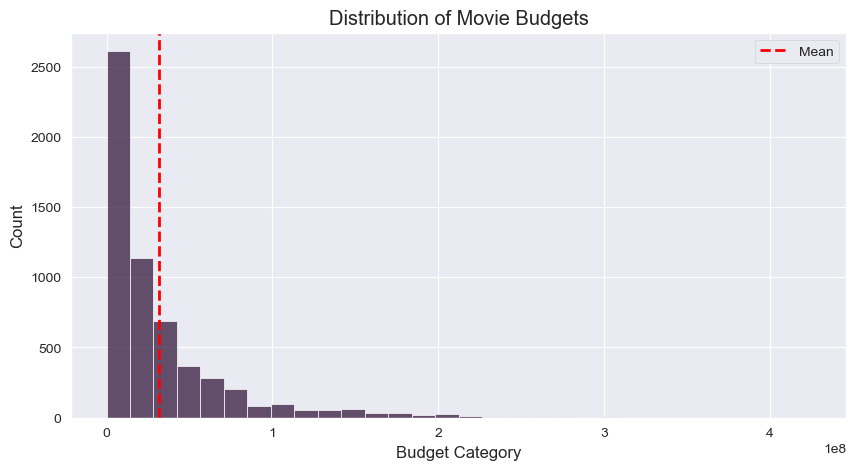

In [66]:
# Plot the distribution of movie budgets
sns.set_style('darkgrid')
sns.set_palette('rocket')
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['production_budget'], bins=30)

# Plot a vertical line for the mean
plt.axvline(movie_budgets['production_budget'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')
plt.legend()
plt.show()

In [55]:
#  Bin the production budget into three categories: Low, Medium, High
labels = ['Low', 'Medium', 'High']
bins = [0, 40000000, 100000000, movie_budgets['production_budget'].max()]
binned_budgets = movie_budgets.copy()
binned_budgets['budget_category'] = pd.cut(binned_budgets['production_budget'], bins=bins, labels=labels)
counts1 = binned_budgets.value_counts('budget_category').to_frame()
counts1.reset_index(inplace=True)
counts1

,budget_category,count
0,Low,4408
1,Medium,1011
2,High,363


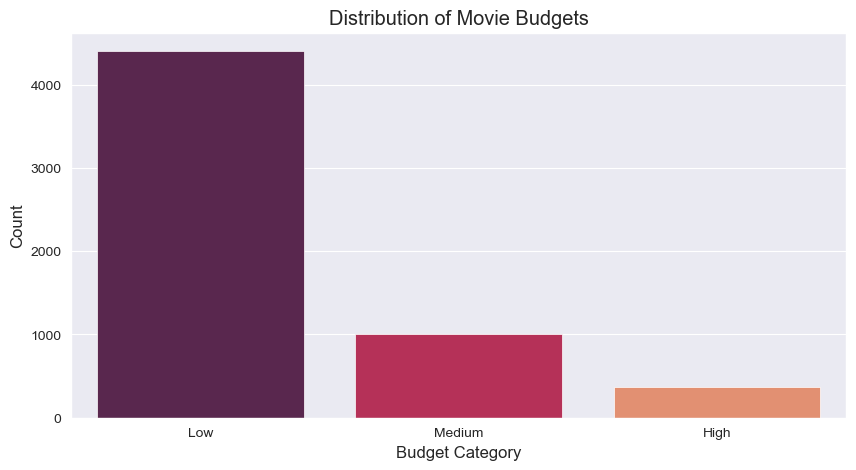

In [63]:
# Create a visualization of the distribution of movie budgets
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x='budget_category', y='count', data=counts1, hue='budget_category', palette='rocket')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')
plt.show();

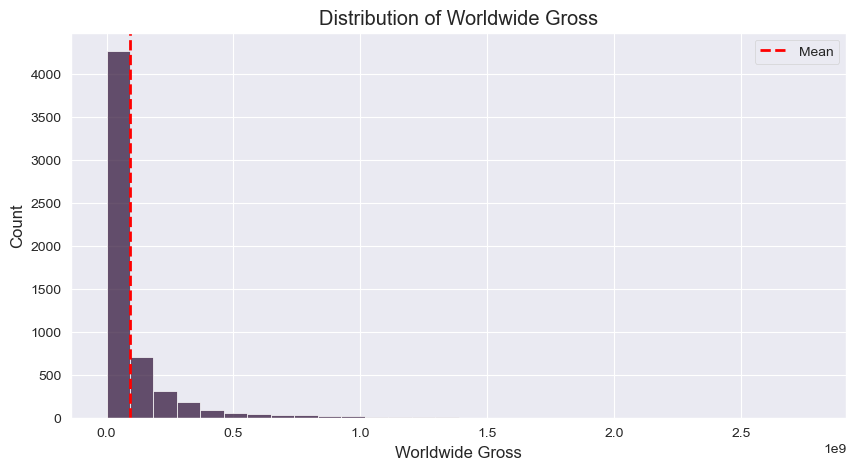

In [67]:
# Create a visualization of the distribution of worldwide gross
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['worldwide_gross'], bins=30)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Count')
plt.axvline(movie_budgets['worldwide_gross'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()

In [72]:
# Bin the worldwide gross into three categories: Low, Medium, High
bins = [0, 25000000, 100000000, binned_budgets['worldwide_gross'].max()]
labels = ['Low', 'Medium', 'High']
binned_budgets['gross_category'] = pd.cut(binned_budgets['worldwide_gross'], bins=bins, labels=labels)
counts = binned_budgets.value_counts('gross_category').to_frame()
counts.reset_index(inplace=True)
counts.head()

,gross_category,count
0,Low,2399
1,Medium,1602
2,High,1414


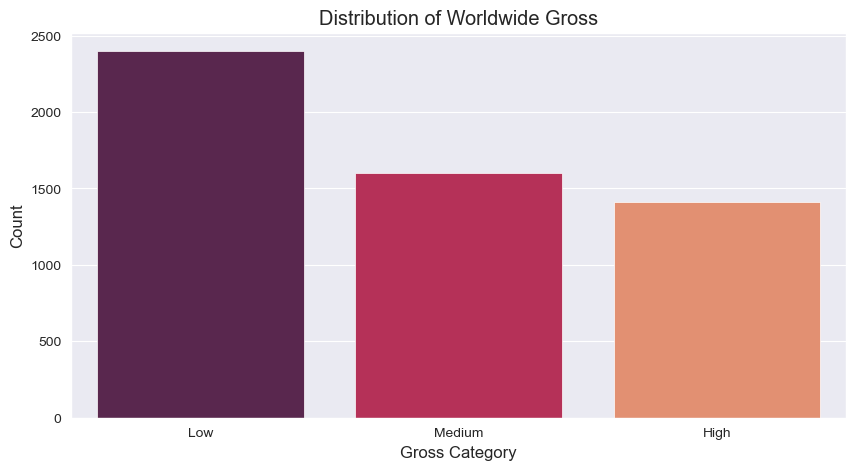

In [74]:
# Plot the distribution of worldwide gross categories
plt.figure(figsize=(10, 5))
sns.barplot(x='gross_category',y='count', data=counts, hue='gross_category', palette='rocket')
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Gross Category')
plt.ylabel('Count')
plt.show()

### IMDB 

In [36]:
# Assign the movie_basics info to movie_basics df
movie_basics = pd.read_sql("""
SELECT 
    movie_id, primary_title, genres
FROM movie_basics""",conn)
movie_basics.head()

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [37]:
# Assign the ovie ratings info to movie_ratiings df
movie_ratings = pd.read_sql("""
SELECT
    movie_id, averagerating
FROM movie_ratings""",conn)
movie_ratings.head()

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [38]:
# Assign the directors to directors df
directors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS director_name
FROM directors
INNER JOIN persons
USING(person_id)
""",conn)
directors.head()

,movie_id,person_id,director_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0878654,nm0089502,Albert Pyun
4,tt0878654,nm2291498,Joe Baile


In [39]:
# Assign actors in the database to a actors df
actors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS actor_name
FROM principals
INNER JOIN persons
USING(person_id)
WHERE category = 'actor' 
""",conn)
actors.head()

,movie_id,person_id,actor_name
0,tt0111414,nm0246005,Tommy Dysart
1,tt0323808,nm2694680,Henry Garrett
2,tt0323808,nm0574615,Graham McTavish
3,tt0417610,nm0532721,Luis Machín
4,tt0417610,nm0069209,Carlos Belloso


In [40]:
# Explode the genres column in the movie_basics DataFrame
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_exploded = movie_basics.explode('genres')

In [41]:
# Merge the movie basics exploded df with the movie ratings df
imdb_exploded = movie_basics_exploded.merge(movie_ratings, on='movie_id', how='inner')
imdb_exploded.head()

,movie_id,primary_title,genres,averagerating
0,tt0063540,Sunghursh,Action,7.0
1,tt0063540,Sunghursh,Crime,7.0
2,tt0063540,Sunghursh,Drama,7.0
3,tt0066787,One Day Before the Rainy Season,Biography,7.2
4,tt0066787,One Day Before the Rainy Season,Drama,7.2


In [42]:
# Merge the exploded imdb dataframe with the movie_budgets dataframe
imdb_revenue_exploded = imdb_exploded.merge(movie_budgets, left_on='primary_title', right_on='movie',how='inner')

imdb_revenue_exploded.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302


In [43]:
# Merge the imdb df with the directors df
imdb_directors = imdb_revenue_exploded.merge(directors, on='movie_id', how='inner')
imdb_directors = imdb_directors.drop(columns=['person_id'])
imdb_directors.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross,director_name
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302,Walter Salles
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302,Walter Salles


In [44]:
# Merge the imdb_directors df with the actors df
imdb_crew = imdb_directors.merge(actors, on='movie_id', how='inner')
imdb_crew = imdb_crew.drop(columns=['person_id','movie'], axis=1)
imdb_crew.head()

,movie_id,primary_title,genres,averagerating,production_budget,worldwide_gross,director_name,actor_name
0,tt0249516,Foodfight!,Action,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
1,tt0249516,Foodfight!,Animation,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
2,tt0249516,Foodfight!,Comedy,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
3,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Sam Riley
4,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Garrett Hedlund


### Ojective 1
#### To determine which movie genres perform highly in terms of revenue and viewer rating.
>**Hypothesis**
>
>H0 - There is not sifnificant difference between genres and average rating
>
>H1 - There is significant difference between genres and average rating

First, we will visualize the average rating by genre to distinguish genres that have high rating

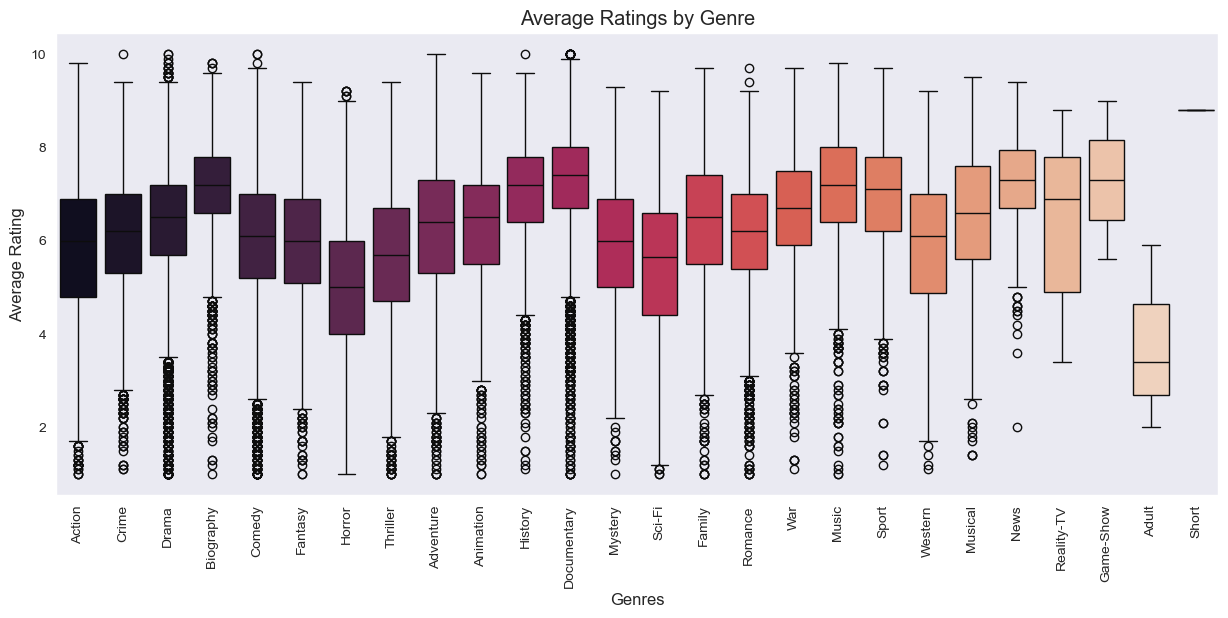

In [95]:
# Visualize the average rating by genre
sns.set_style('dark')
plt.figure(figsize=(15,6))
sns.boxplot(x='genres', y='averagerating', data=imdb_exploded, hue='genres', palette='rocket')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average rating**                                                 
Calculation of average rating and grouping by genre will help us examine genres that have acquired high rating

In [46]:
# Group by genre and calculate the average rating
best_genres = imdb_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10).to_frame()
best_genres.reset_index(inplace=True)
best_genres

,genres,averagerating
0,Short,8.800000
1,Documentary,7.332090
2,Game-Show,7.300000
3,News,7.271330
4,Biography,7.162274
5,Music,7.091972
6,History,7.040956
7,Sport,6.961493
8,War,6.584291
9,Reality-TV,6.500000


**Visualization of the above using a bar plot;**

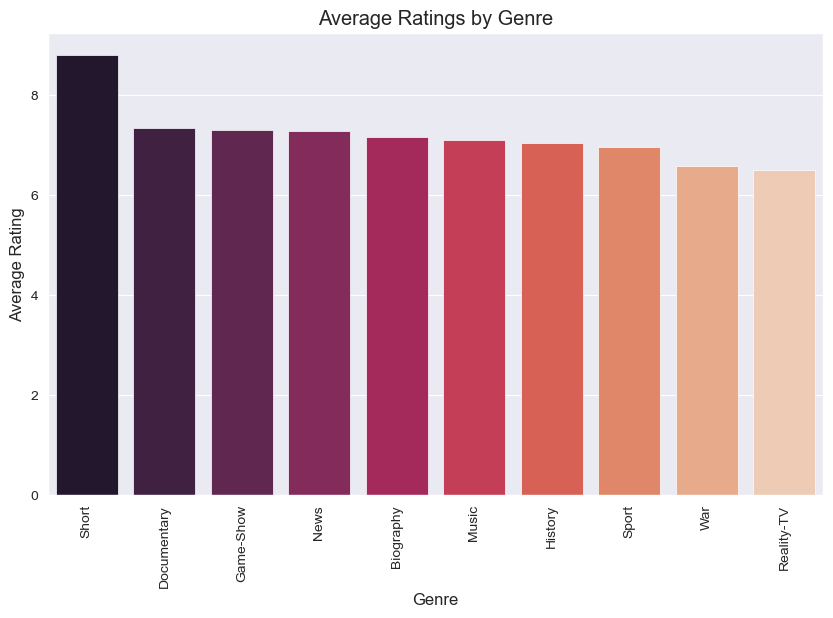

In [80]:
# Visualize the average rating by genre using a bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y='averagerating', data=best_genres, hue='genres', palette='rocket')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average worldwide gross**                                                      
We examine the genres that have attracted highest worldwide gross through calculation of the average world gross and grouping by genre

In [48]:
# Group by genre and calculate the average worldwide gross
genre_revenue = imdb_revenue_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).to_frame().head(10)
genre_revenue.reset_index(inplace=True)

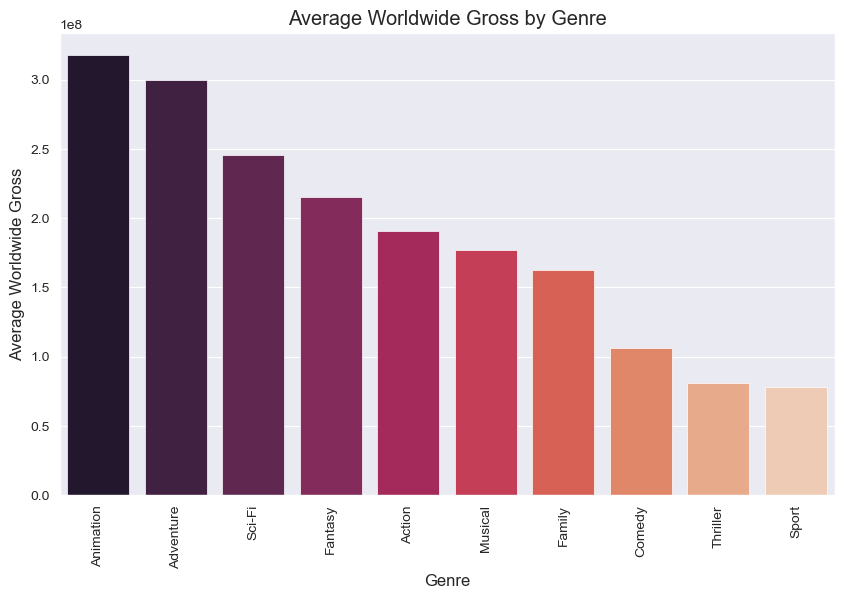

In [82]:
# Visualize the average worldwide gross by genre using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='genres',y='worldwide_gross', data=genre_revenue, hue='genres', palette='rocket')
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=90)
plt.show()

In [50]:
# Create a list of the top ten genres by worldwide gross
genre_list = genre_revenue['genres'].to_list()


**Check If there is significant difference in Average ratings between genres**

**Findings**
1. Top 3 Genre that performs well in worldwide gross are Animations,Adventure and Sci-Fi
2. Genres with high average ratings are short,Documentary and Game Show with 8.80,7.33 and 7.30 rating respectively

In [51]:
# Perform ANOVA to check if there is a significant difference in average ratings between genres
anova_data = [imdb_exploded[imdb_exploded['genres'] == genre]['averagerating'] for genre in genre_list]
f_stat, p_val = stats.f_oneway(*anova_data)
if p_val < 0.05:
    print("Reject H0: There is a significant difference in average ratings between genres.")
else:
    print("Fail to reject H0: {There is no significant difference in average ratings between genres.}")


Reject H0: There is a significant difference in average ratings between genres.


**Interpretation:**                                                                
From the above, there is statistical evidence that average ratings significantly 
differ between at least some genres.                                                                      
This means genre does influence how movies are rated on average.



**Business Recommendation**                                                                               
Genre that will yield higher worldwide gross is Animation while genre that have higher viewer satisfaction/rating is documentary

### Objective 2: To determine which directors and actors are linked to the highest performing movies.

This objective will generate insight on the best directors and actors in their fields. This will enable the Microsoft Team to make informed decisions on which actors and directors to hire for their movies. 
The directors and actors will be selected only from the top 10 genres that perform highly in terms of revenue and their average rating compared to come up with a list of the best directors and actors that garner the highest ratings in each genre. 

The steps to be followed are:
* Select the top 10 genres that perform highly in terms of revenue (this has been done in the previous objective by the creation of `genre_list`).
* Create a new dataframe `imdb_genre_filtered_d` and `imdb_genre_filtered_c` that will contain the a list of directors and actors that are linked to the top 10 genres respectively.
* Group the dataframe by the `directors` and `genres` columns and calculate the average rating for each director in each genre.
* Create a bar chart plot containing the top 5 directors and actors in each genre in terms of average rating.

Step 1: Select the top 10 genres that perform highly in terms of revenue (this has been done in the previous objective so on to the next objective).



In [83]:
# Let's call out the list once more
genre_list

['Animation',
 'Adventure',
 'Sci-Fi',
 'Fantasy',
 'Action',
 'Musical',
 'Family',
 'Comedy',
 'Thriller',
 'Sport']

Step 2: Let's create a new dataframe named `imdb_filtered_d` which contains a list of directors that are assicated with the top 10 revenue-generating genres.

In [84]:
# Filter the imdb_directors dataframe to include genres that are in the genre_list
imdb_genre_filtered_d = imdb_crew[imdb_crew['genres'].isin(genre_list)]

Step 3: Group the dataframe by the `directors` and `genres` columns and calculate the average rating for each director in each genre. 

This will give us a list of directors and their average ratings in each genre.

In [85]:
# Group the dataframe by director_name and genres column and find the average rating of each director
# Include the as_index=False parameter to ensure grouping columns are retained as normal columns instead of being set as the index.
directors_filtered = imdb_genre_filtered_d.groupby(['director_name','genres'], as_index=False)['averagerating'].mean()

# Preview the df
directors_filtered.head()

,director_name,genres,averagerating
0,Aaron Alon,Musical,7.9
1,Aaron Seltzer,Comedy,3.4
2,Aash Aaron,Thriller,8.1
3,Aashiq Abu,Thriller,8.6
4,Abby Kohn,Comedy,5.4


Step 4: Create a bar chart plot containing the top 5 directors in each genre in terms of average rating. This will give us a visual representation of the best directors in each genre.

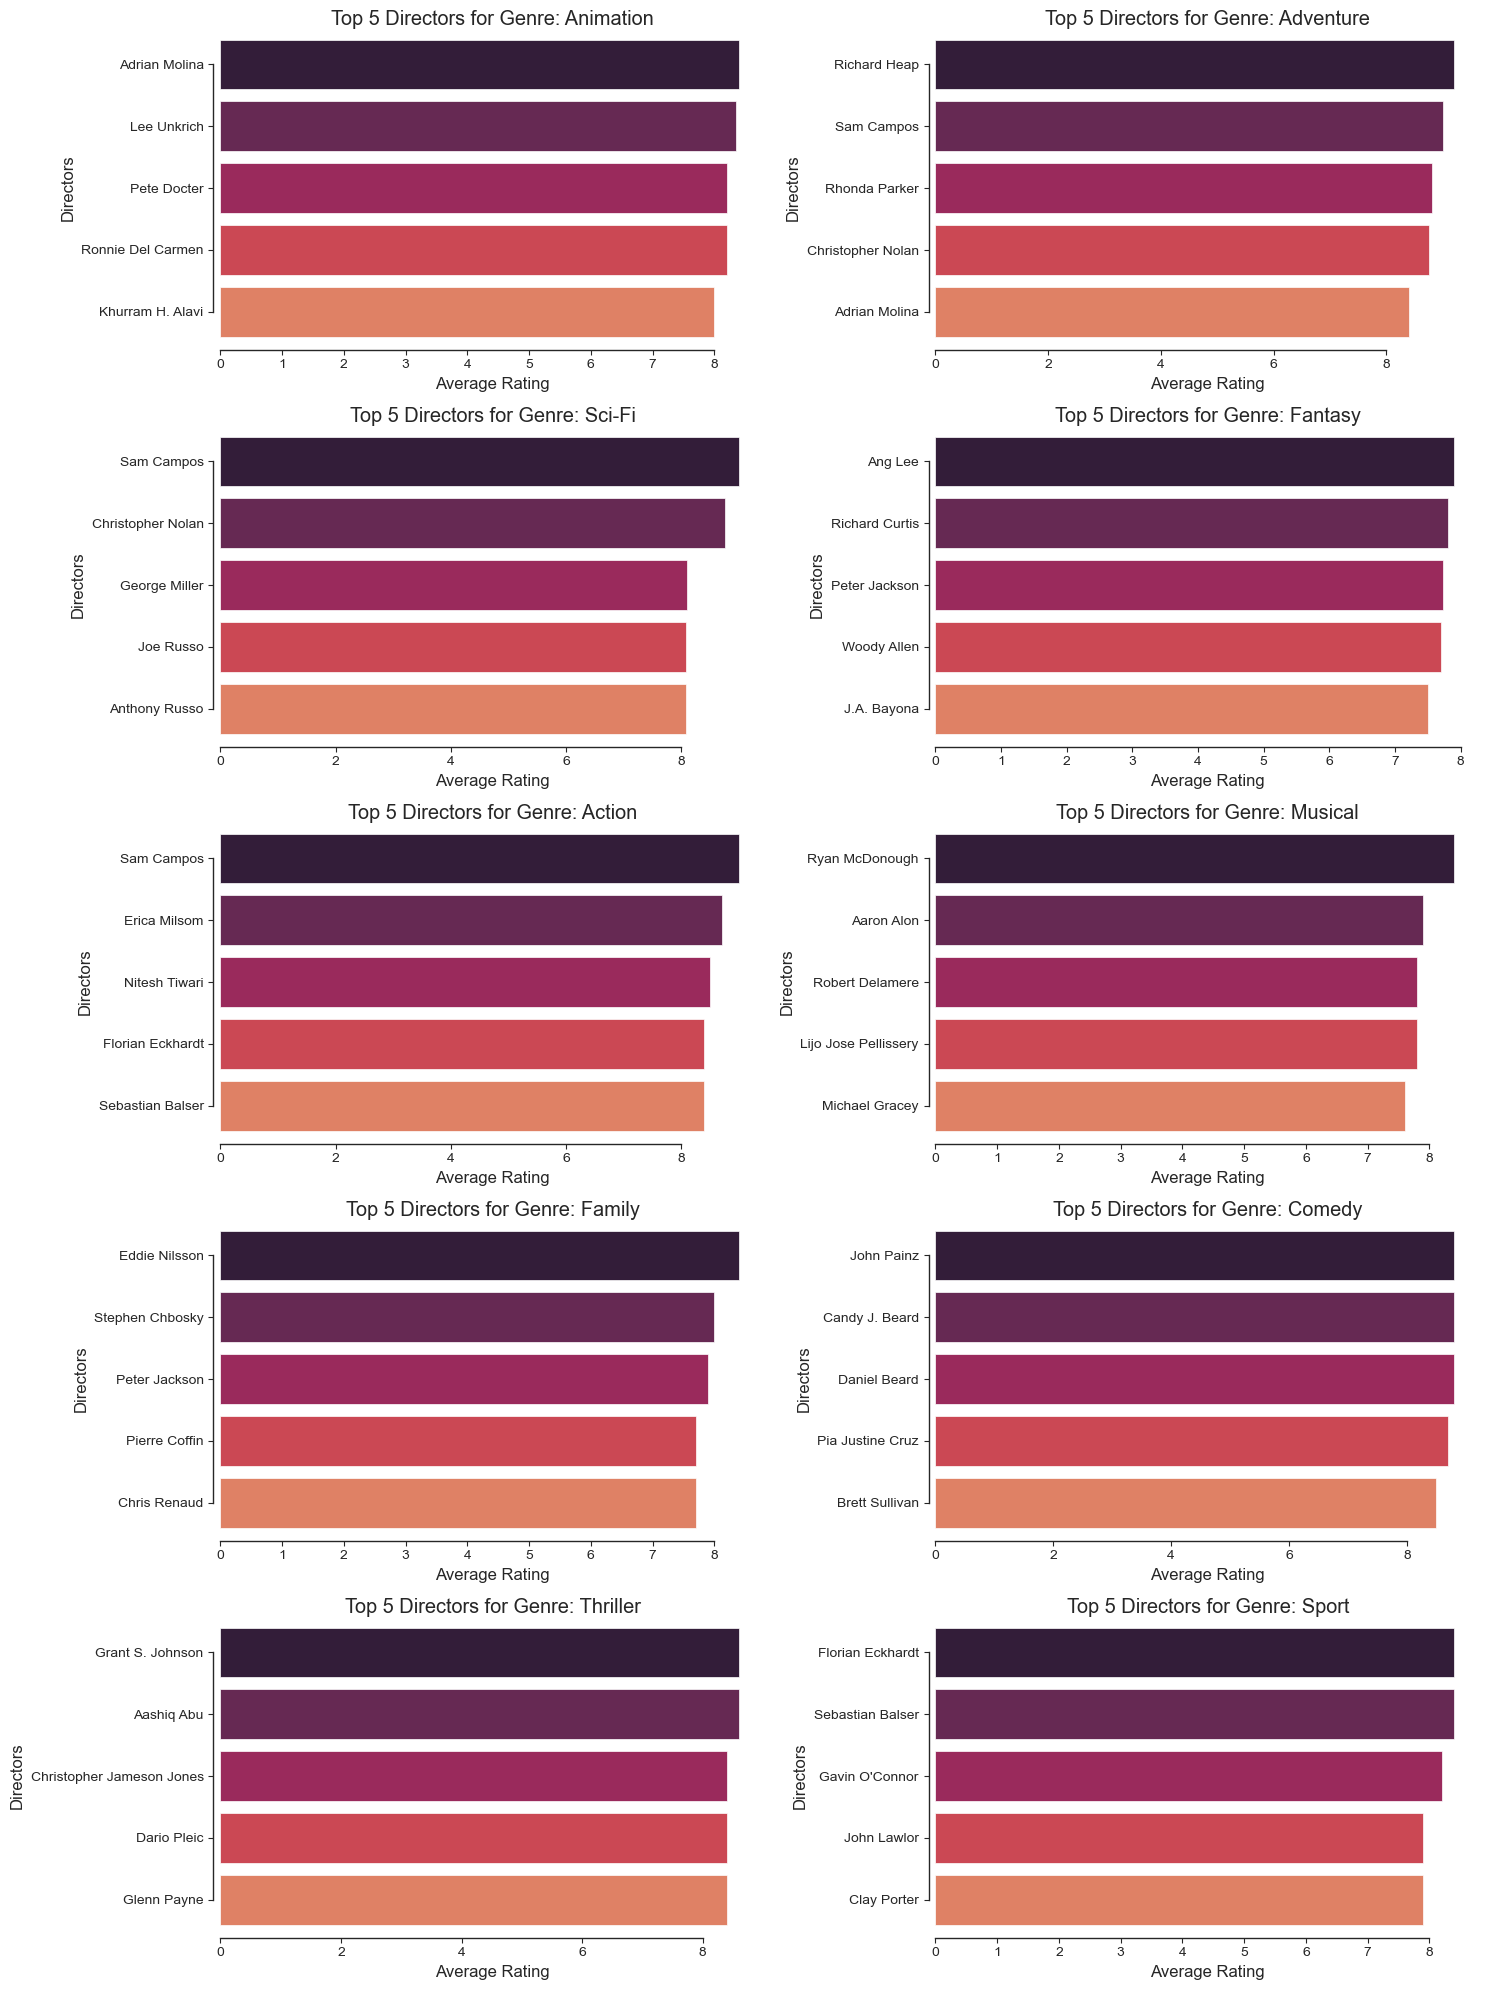

In [86]:
# Visualize the average rating by director for the top 10 genres
sns.set_style('ticks')
sns.set_palette('rocket')

# Create a subplot grid with 5 columns and 2 rows to accomodate 10 plots; one for each genre
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))

# Create a bar plot for each genre. 
# Loop through the top 10 genres to generate individual plots for each genre together with the top 5 directors

for i in range(10):
    row = i//2 # Calculate the row index of each plot
    col = i%2 # Calculate the column index of each plot

    # Filter data for the current genre, sort directors by average rating and select the top 5 directors
    top_5_directors = directors_filtered[directors_filtered['genres'] == genre_list[i]].sort_values(by='averagerating', ascending=False).head()
    sns.barplot(y='director_name', x='averagerating', data=top_5_directors, hue='director_name', ax=axes[row][col])
    # Customize the current subplot's labels and title
    axes[row][col].set_ylabel('Directors')
    axes[row][col].set_xlabel('Average Rating')
    axes[row][col].set_title(f"Top 5 Directors for Genre: {genre_list[i]}")
    

# Adjust the plot to avoid overlapping
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show() 

This visualization will help us to identify the best directors in each genre and help Microsoft in making informed decisions on which directors to hire for their movies depending on the genre.

The last step remaining is to create a dataframe containing the the top 5 directors showcased in the bar chart linked to their respective genres:

In [87]:
# Initialize an empty dict
d_recommendations = {}
# Loop over each genre in the genre_list and filter out the top 5 directors
for genre in genre_list:
    directors = directors_filtered[directors_filtered['genres'] == genre].sort_values(by='averagerating', ascending=False).head()

    # Set the dict key as the genre and the values as a list of the top 5 directors in that genre
    d_recommendations[genre] = directors['director_name'].to_list()

# Convert the list into a df
director_recommendations = pd.DataFrame(d_recommendations)
# Call out the df
director_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action,Musical,Family,Comedy,Thriller,Sport
0,Adrian Molina,Richard Heap,Sam Campos,Ang Lee,Sam Campos,Ryan McDonough,Eddie Nilsson,John Painz,Grant S. Johnson,Florian Eckhardt
1,Lee Unkrich,Sam Campos,Christopher Nolan,Richard Curtis,Erica Milsom,Aaron Alon,Stephen Chbosky,Candy J. Beard,Aashiq Abu,Sebastian Balser
2,Pete Docter,Rhonda Parker,George Miller,Peter Jackson,Nitesh Tiwari,Robert Delamere,Peter Jackson,Daniel Beard,Christopher Jameson Jones,Gavin O'Connor
3,Ronnie Del Carmen,Christopher Nolan,Joe Russo,Woody Allen,Florian Eckhardt,Lijo Jose Pellissery,Pierre Coffin,Pia Justine Cruz,Dario Pleic,John Lawlor
4,Khurram H. Alavi,Adrian Molina,Anthony Russo,J.A. Bayona,Sebastian Balser,Michael Gracey,Chris Renaud,Brett Sullivan,Glenn Payne,Clay Porter


Next, let's carry out the same steps for actors. We will create a new dataframe named `imdb_filtered_c` which contains a list of actors that are associated with the top 10 revenue-generating genres. We will then group the dataframe by the `actors` and `genres` columns and calculate the average rating for each actor in each genre. Finally, we will create a bar chart plot containing the top 5 actors in each genre in terms of average rating.


Step 1: Select the top 10 genres that perform highly in terms of revenue (this has been done in the previous objective so on to the next objective).

Step 2: Let's create a new dataframe named `imdb_filtered_c` which contains a list of actors that are assicated with the top 10 revenue-generating genres.

In [88]:
# Filter the imdb_crew dataframe to include genres that are in the genre_list
imdb_genre_filtered_c = imdb_crew[imdb_crew['genres'].isin(genre_list)]

# Preview the df
imdb_genre_filtered_c.head()

,movie_id,primary_title,genres,averagerating,production_budget,worldwide_gross,director_name,actor_name
0,tt0249516,Foodfight!,Action,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
1,tt0249516,Foodfight!,Animation,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
2,tt0249516,Foodfight!,Comedy,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
3,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Sam Riley
4,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Garrett Hedlund


Step 3: Group the dataframe by the `actors` and `genres` columns and calculate the average rating for each actor in each genre. This will give us a list of actors and their average ratings in each genre.

In [90]:
# Group the dataframe by the `actors` and `genres` columns and calculate the average rating for each actor in each genre
actors_filtered = imdb_genre_filtered_c.groupby(['actor_name','genres'], as_index=False)['averagerating'].mean()
actors_filtered.head()

,actor_name,genres,averagerating
0,50 Cent,Action,6.85
1,A.J. Buckley,Comedy,5.80
2,A.J. Buckley,Family,5.80
3,A.J. DeLucia,Action,4.20
4,A.J. DeLucia,Sci-Fi,4.20


Step 4: Create a bar chart plot containing the top 5 actors in each genre in terms of average rating. This will give us a visual representation of the best actors in each genre.

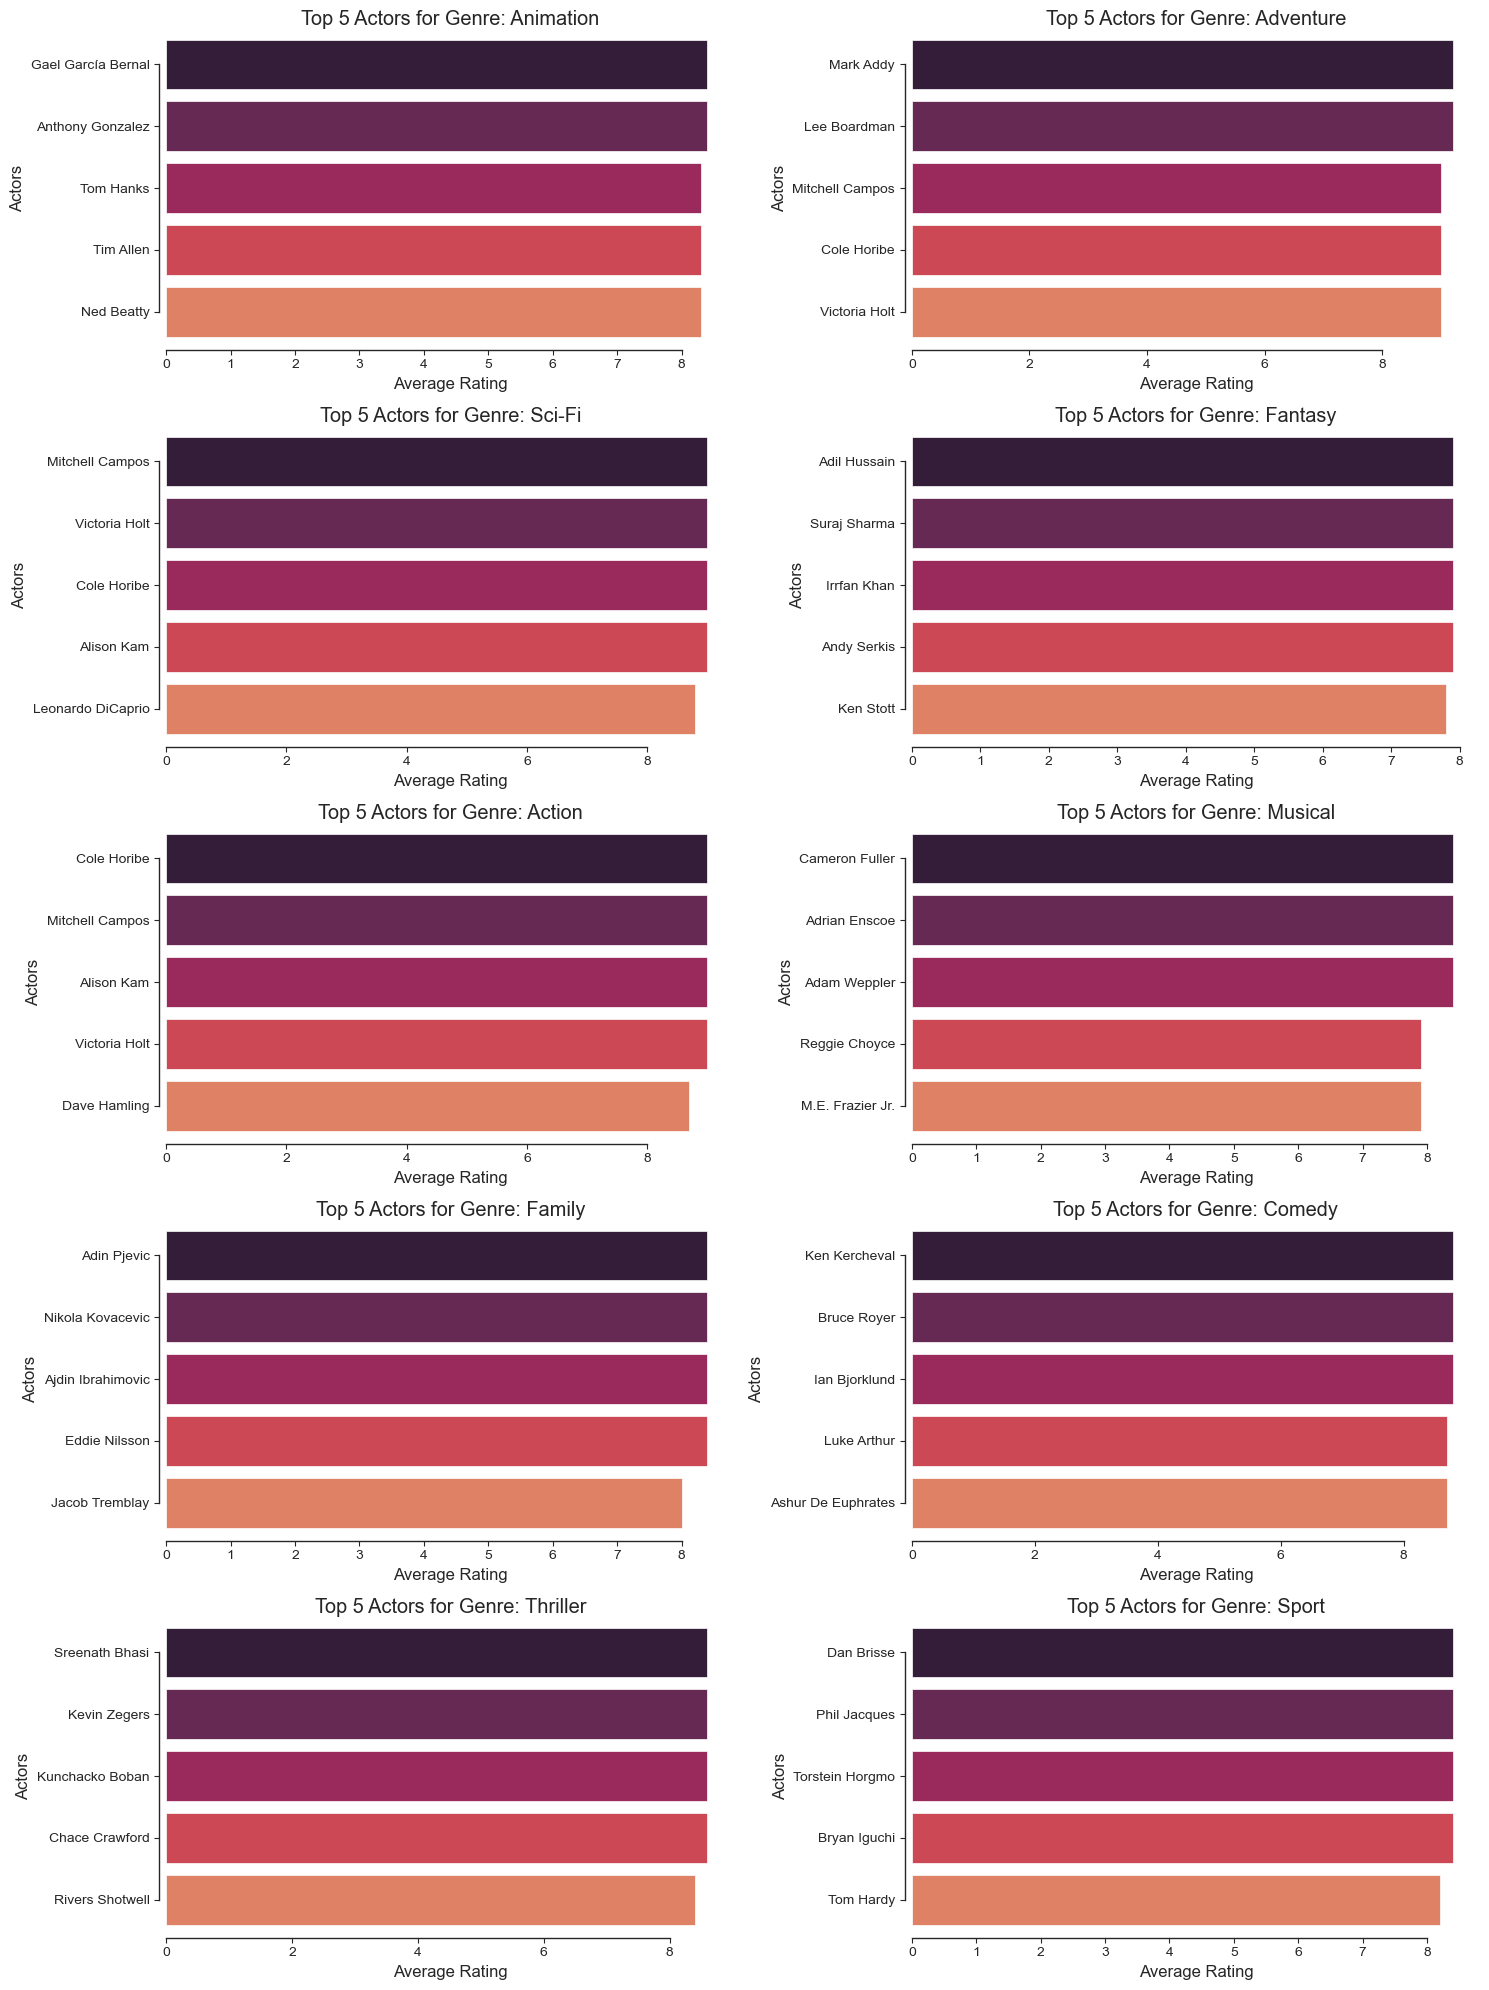

In [91]:
# Visualize the average rating by actor for the top 10 genres
# Create a subplot grid with 5 columns and 2 rows to accomodate 10 plots; one for each genre
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
sns.set_palette('rocket')
# Create a bar plot for each genre. 
# Loop through the top 10 genres to generate individual plots for each genre together with the top 5 actors

for i in range(10):
    row = i//2 # Calculate the row index of each plot
    col = i%2 # Calculate the column index of each plot

    # Filter data for the current genre, sort actors by average rating and select the top 5actors
    top_5_actors = actors_filtered[actors_filtered['genres'] == genre_list[i]].sort_values(by='averagerating', ascending=False).head()
    sns.barplot(y='actor_name', x='averagerating', data=top_5_actors, hue='actor_name',ax=axes[row][col])
    # Customize the current subplot's labels and title
    axes[row][col].set_ylabel('Actors')
    axes[row][col].set_xlabel('Average Rating')
    axes[row][col].set_title(f"Top 5 Actors for Genre: {genre_list[i]}")

# Adjust the plot to avoid overlapping
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show() 

This visualization presents the average rating for each actor within their respective genres, making it easy to identify the top-performing actors for each genre.

The final task is to construct a dataframe featuring the top 5 actors displayed in the bar chart along with their corresponding genres:

In [92]:
# Initialize an empty dict
c_recommendations = {}
# Loop over each genre in the genre_list and filter out the top 5 actors
for genre in genre_list:
    actors = actors_filtered[actors_filtered['genres'] == genre].sort_values(by='averagerating', ascending=False).head()

    # Set the dict key as the genre and the values as a list of the top 5 actors in that genre
    c_recommendations[genre] = actors['actor_name'].to_list()

# Convert the list into a df
actors_recommendations = pd.DataFrame(c_recommendations)
# Call out the df
actors_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action,Musical,Family,Comedy,Thriller,Sport
0,Gael García Bernal,Mark Addy,Mitchell Campos,Adil Hussain,Cole Horibe,Cameron Fuller,Adin Pjevic,Ken Kercheval,Sreenath Bhasi,Dan Brisse
1,Anthony Gonzalez,Lee Boardman,Victoria Holt,Suraj Sharma,Mitchell Campos,Adrian Enscoe,Nikola Kovacevic,Bruce Royer,Kevin Zegers,Phil Jacques
2,Tom Hanks,Mitchell Campos,Cole Horibe,Irrfan Khan,Alison Kam,Adam Weppler,Ajdin Ibrahimovic,Ian Bjorklund,Kunchacko Boban,Torstein Horgmo
3,Tim Allen,Cole Horibe,Alison Kam,Andy Serkis,Victoria Holt,Reggie Choyce,Eddie Nilsson,Luke Arthur,Chace Crawford,Bryan Iguchi
4,Ned Beatty,Victoria Holt,Leonardo DiCaprio,Ken Stott,Dave Hamling,M.E. Frazier Jr.,Jacob Tremblay,Ashur De Euphrates,Rivers Shotwell,Tom Hardy


# Recommendations

**Objective 2: To determine which directors and actors are linked to the highest performing movies.**

The aim of this objective was to uncover the best directors and actors that excel in each of the genres. This would in turn help the Microsoft Team make an informed decision on which actors and directors to hire in each genre. The insight uncovered from this objective was in form of a dataframe that contained names of each actor and director that exceled in their respective fields. This would be very beneficial as the Microsoft Team would be able to pick out directors and actors they needed depending on the genre of their choosing. The two dataframes are highlighted below:

In [93]:
# Actors recommendations
actors_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action,Musical,Family,Comedy,Thriller,Sport
0,Gael García Bernal,Mark Addy,Mitchell Campos,Adil Hussain,Cole Horibe,Cameron Fuller,Adin Pjevic,Ken Kercheval,Sreenath Bhasi,Dan Brisse
1,Anthony Gonzalez,Lee Boardman,Victoria Holt,Suraj Sharma,Mitchell Campos,Adrian Enscoe,Nikola Kovacevic,Bruce Royer,Kevin Zegers,Phil Jacques
2,Tom Hanks,Mitchell Campos,Cole Horibe,Irrfan Khan,Alison Kam,Adam Weppler,Ajdin Ibrahimovic,Ian Bjorklund,Kunchacko Boban,Torstein Horgmo
3,Tim Allen,Cole Horibe,Alison Kam,Andy Serkis,Victoria Holt,Reggie Choyce,Eddie Nilsson,Luke Arthur,Chace Crawford,Bryan Iguchi
4,Ned Beatty,Victoria Holt,Leonardo DiCaprio,Ken Stott,Dave Hamling,M.E. Frazier Jr.,Jacob Tremblay,Ashur De Euphrates,Rivers Shotwell,Tom Hardy


In [94]:
# Directors recommendations
director_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action,Musical,Family,Comedy,Thriller,Sport
0,Adrian Molina,Richard Heap,Sam Campos,Ang Lee,Sam Campos,Ryan McDonough,Eddie Nilsson,John Painz,Grant S. Johnson,Florian Eckhardt
1,Lee Unkrich,Sam Campos,Christopher Nolan,Richard Curtis,Erica Milsom,Aaron Alon,Stephen Chbosky,Candy J. Beard,Aashiq Abu,Sebastian Balser
2,Pete Docter,Rhonda Parker,George Miller,Peter Jackson,Nitesh Tiwari,Robert Delamere,Peter Jackson,Daniel Beard,Christopher Jameson Jones,Gavin O'Connor
3,Ronnie Del Carmen,Christopher Nolan,Joe Russo,Woody Allen,Florian Eckhardt,Lijo Jose Pellissery,Pierre Coffin,Pia Justine Cruz,Dario Pleic,John Lawlor
4,Khurram H. Alavi,Adrian Molina,Anthony Russo,J.A. Bayona,Sebastian Balser,Michael Gracey,Chris Renaud,Brett Sullivan,Glenn Payne,Clay Porter
